**DATA ANALYSIS**

In [1]:
import pandas as pd
totalled_df = pd.DataFrame.from_csv('totalled_df.csv')
totalled_df.head()

,market-price,trade-volume,median-confirmation-time,hash-rate,transaction-fees-usd,n-unique-addresses,n-transactions,mempool-count,n-transactions-excluding-popular
x,,,,,,,,,
1333238400,4.92,182041.75,8.74,12.12,21.40,9586,5619,NaN,4221
1333324800,5.08,429855.97,11.46,10.26,21.03,10766,6086,NaN,4676
1333411200,5.00,394194.22,10.03,10.34,23.17,13073,7539,NaN,5962
1333497600,4.96,281521.13,10.15,11.40,19.64,12774,7479,NaN,5980
1333584000,4.94,187559.84,10.27,9.62,30.71,11946,6977,NaN,5552


**Separate only mempool data**

In [2]:
#25th April 2016. mempool data comes into existence
recent_df = totalled_df.loc[1461542400:,:]
recent_df.to_csv('recent_df.csv')
recent_df.head()

,market-price,trade-volume,median-confirmation-time,hash-rate,transaction-fees-usd,n-unique-addresses,n-transactions,mempool-count,n-transactions-excluding-popular
x,,,,,,,,,
1461542400,463.86,36817995.51,9.68,1128032.65,20084.42,407004,217564,864.73,246337
1461628800,467.98,34854624.59,7.75,1341204.17,158063.23,436154,250744,1642.73,235851
1461715200,447.31,42654741.35,10.36,1145796.94,20626.13,392821,239435,1619.85,243750
1461801600,450.00,38051508.64,10.00,1207843.18,22329.15,374956,247958,3022.03,257795
1461888000,456.16,21063414.65,7.43,1403229.58,22771.31,426515,261884,3999.91,214169


**Plot all data**

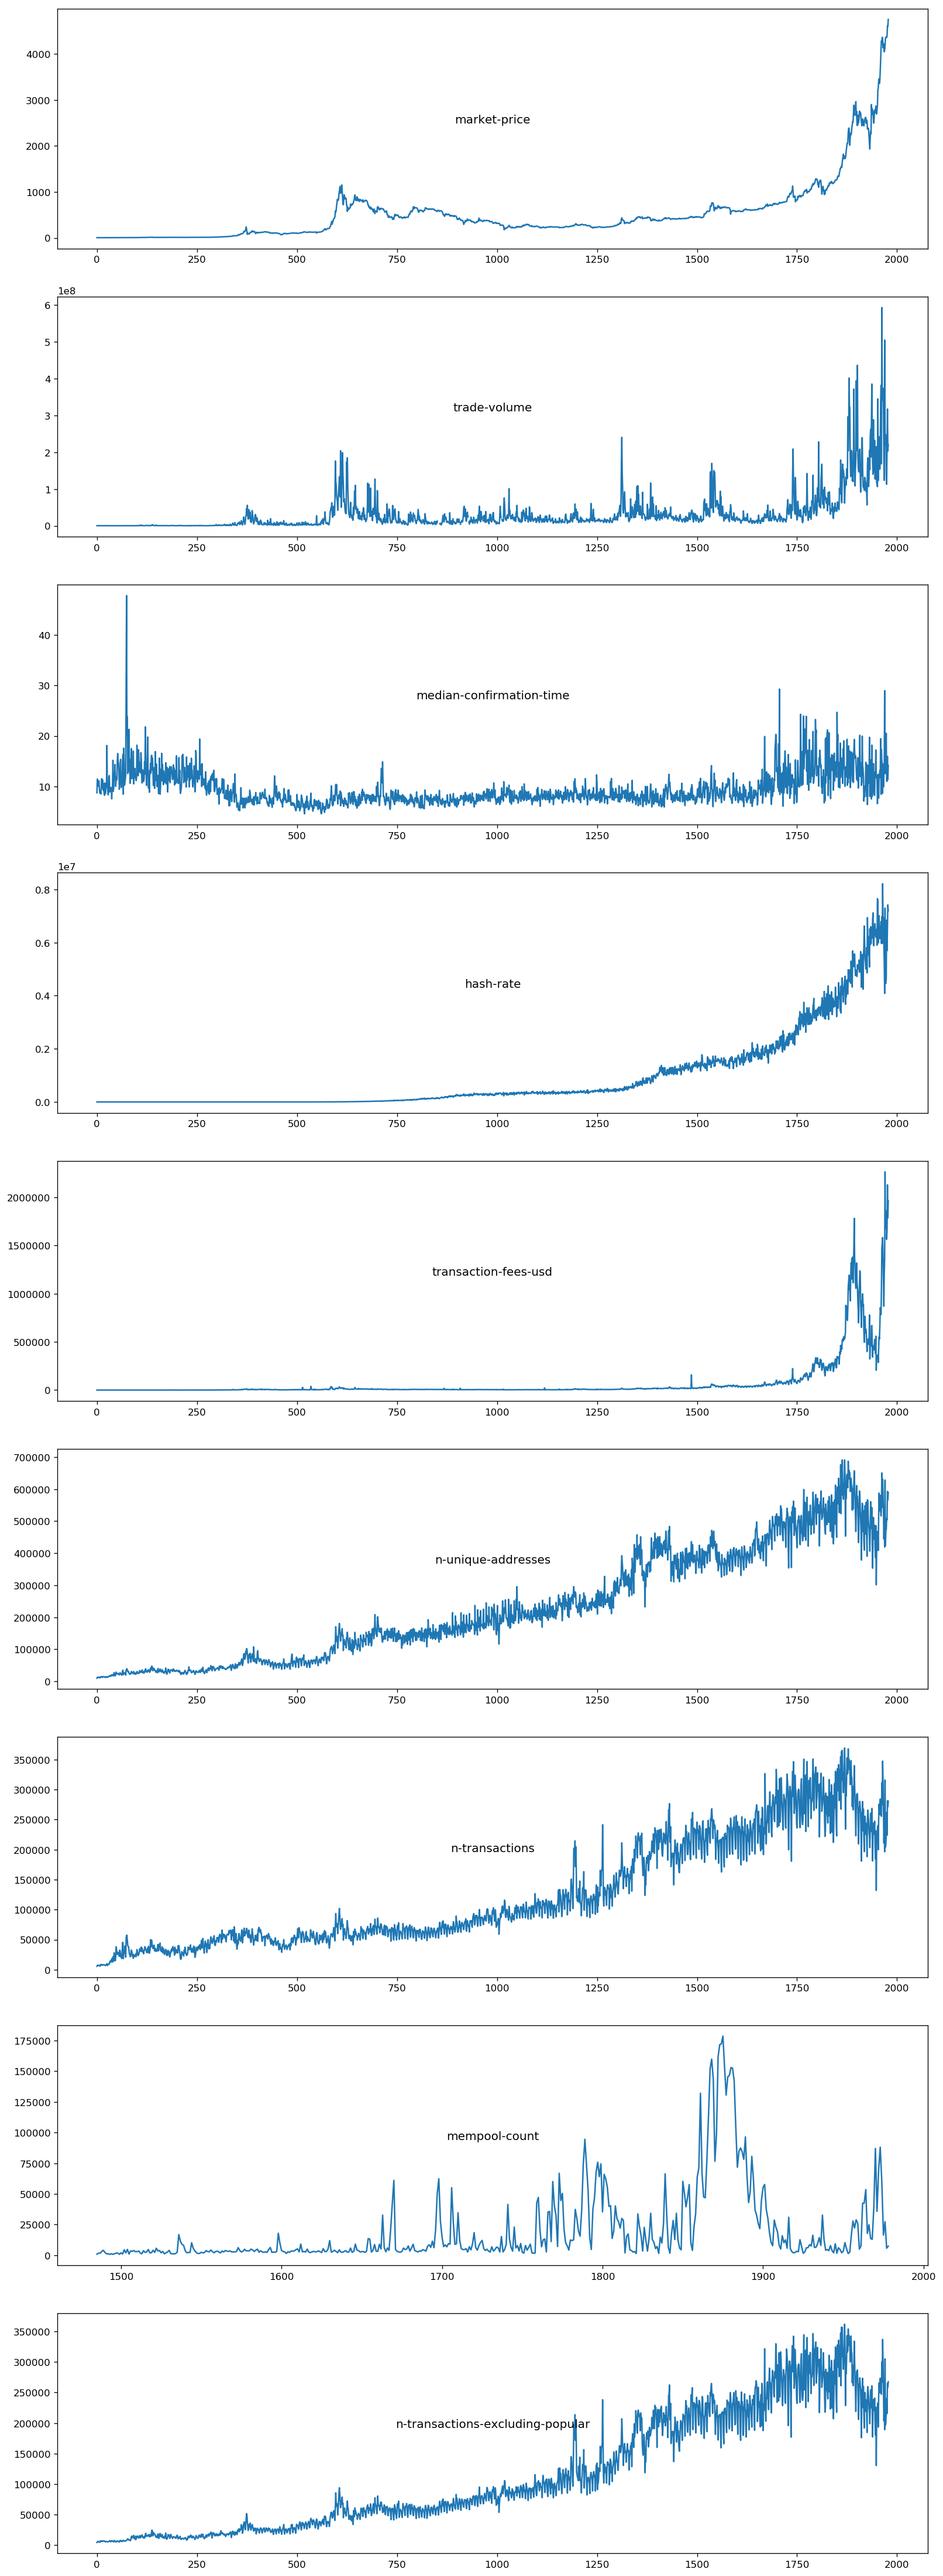

In [3]:
# PLOT GRAPHS OF ALL FEATURE DATA
from matplotlib import pyplot

dataset = totalled_df
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5, 6, 7, 8]
i = 1
# plot each column
pyplot.figure(figsize=(16, 48), dpi=120)
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.5, loc='center')
    i += 1
pyplot.savefig('totalled_df.png')
pyplot.show()

In [4]:
# CALCULATE AMOUNT OF MISSING DATA
NaN_by_column = totalled_df.isnull().sum(axis=0).tolist()
print("Missing Data Elements")
print(NaN_by_column)

Missing Data Elements
[0, 15, 0, 0, 0, 0, 0, 1485, 0]


**Plot last ~1.8 years**

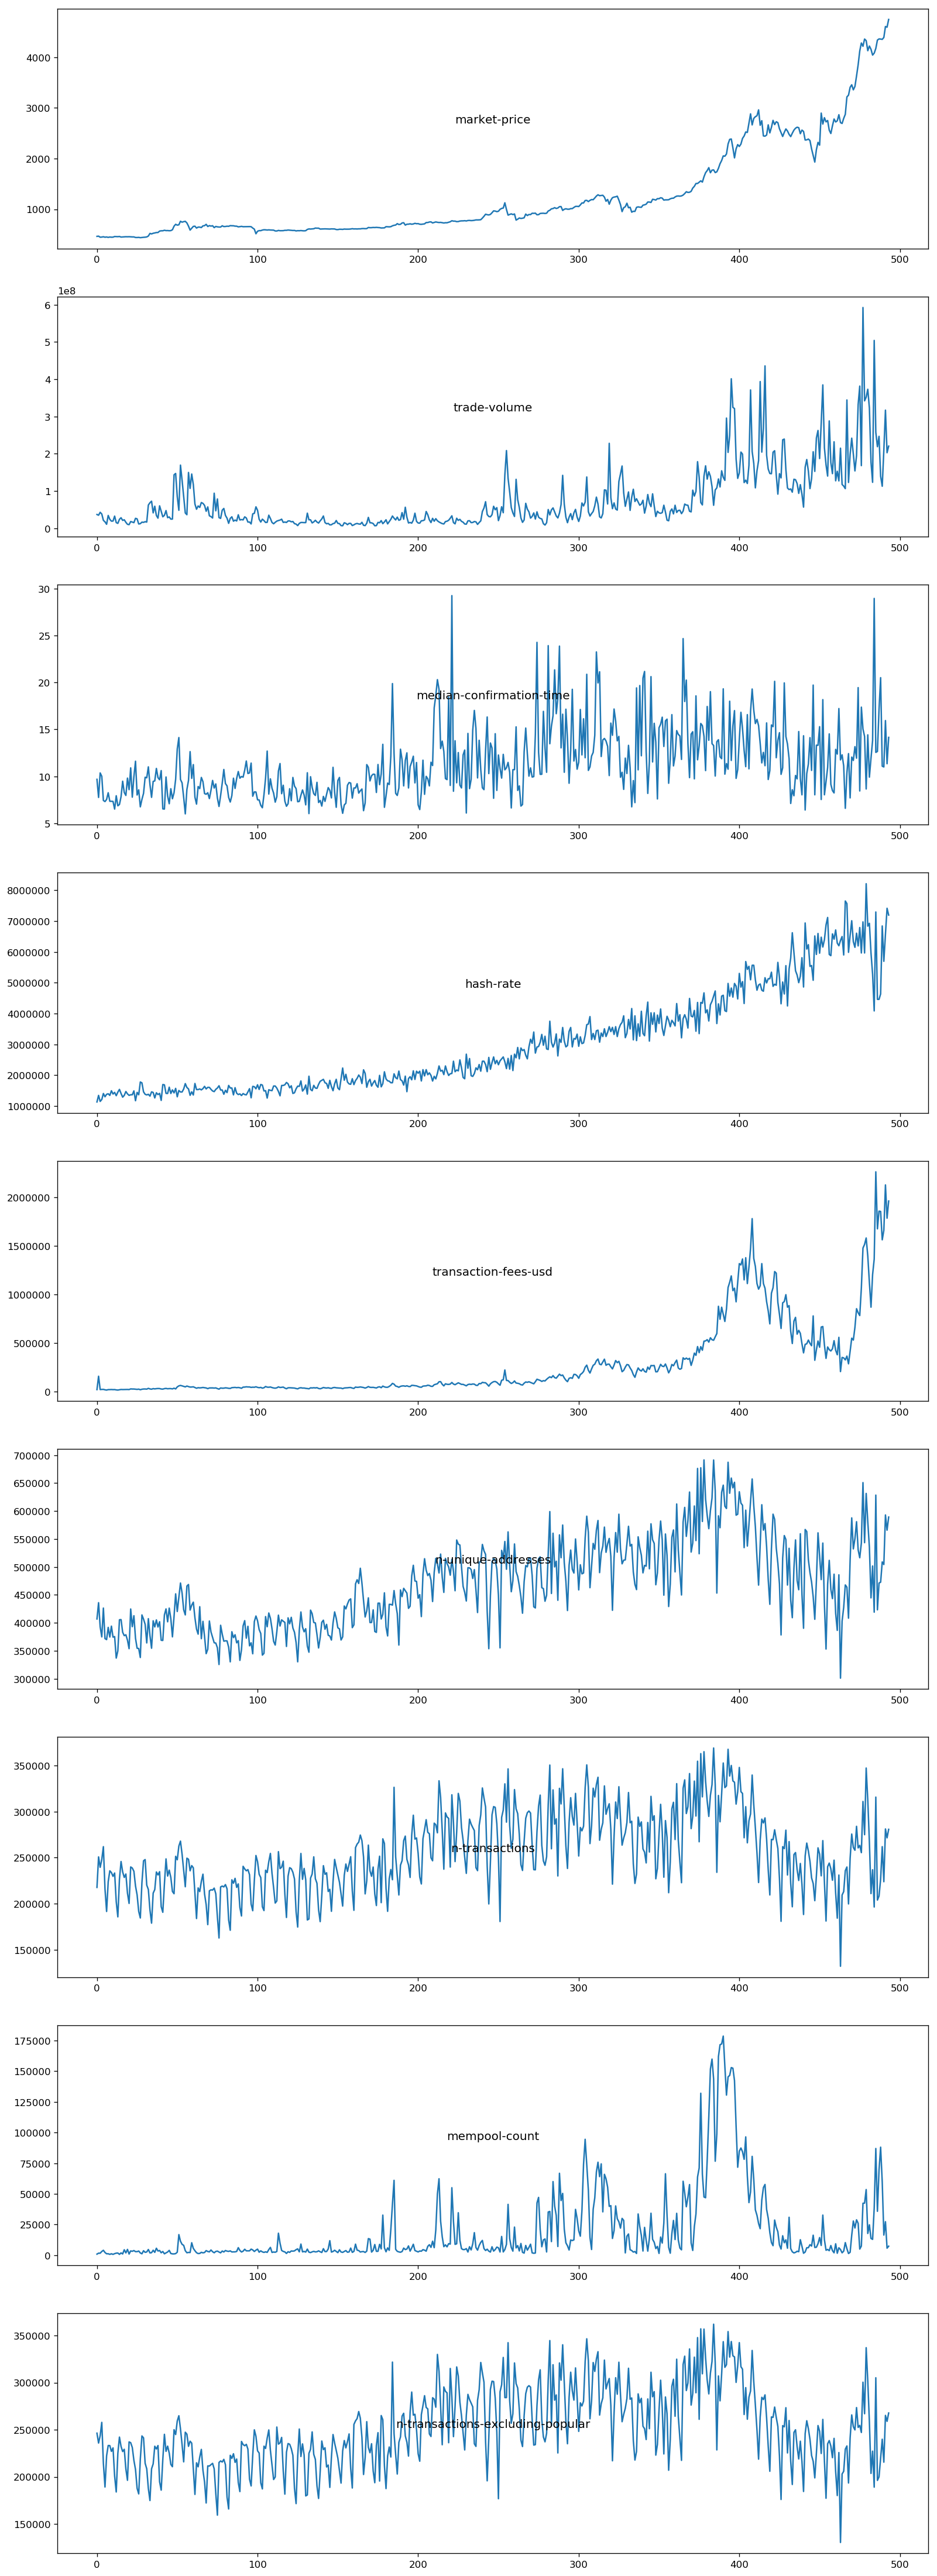

In [5]:
# PLOT ALL FEATURE DATA FOR PAST 1.8 YEARS
dataset = recent_df
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5, 6, 7, 8]
i = 1
# plot each column
pyplot.figure(figsize=(16, 48), dpi=120)
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.5, loc='center')
    i += 1
pyplot.savefig('recent_df.png')
pyplot.show()

**Perform Feature Analysis**

In [6]:
# CREATE ARRAY OF FEATURES
feature_dict = {0: 'market-price', 1: 'trade-volume', 2: 'median-confirmation-time', 3: 'hash-rate', 4: 'transaction-fees-usd', 
     5: 'n-unique-addresses', 6: 'n-transactions', 7: 'mempool-count', 8: 'n-transactions-excluding-popular'}

features = []
for k in feature_dict:
    features.append(recent_df[feature_dict[k]].values)

market_prices = features[0]

In [7]:
# CALCULATE FEATURE CORRELATION
import numpy as np
from scipy.stats import pearsonr

print("Feature compared with market price {0:9} correlation and p-value for the correlation: {1}".format("", ""))
print()
index = 0
for feature in features:
    output = "Feature: {0:35} correlation: {1}".format(feature_dict[index], pearsonr(market_prices, feature))
    print(output)
    index+=1

Feature compared with market price           correlation and p-value for the correlation: 

Feature: market-price                        correlation: (1.0, 0.0)
Feature: trade-volume                        correlation: (0.80339745939527296, 7.4429872654938403e-113)
Feature: median-confirmation-time            correlation: (0.33487166351173453, 2.0749950914237326e-14)
Feature: hash-rate                           correlation: (0.90615637613618905, 5.3568965627674746e-186)
Feature: transaction-fees-usd                correlation: (0.89727696743988095, 7.8170901911459526e-177)
Feature: n-unique-addresses                  correlation: (0.49688204825161469, 3.6623571183885103e-32)
Feature: n-transactions                      correlation: (0.18862331373402064, 2.4465115303808002e-05)
Feature: mempool-count                       correlation: (0.34172804593471101, 5.6082361229183528e-15)
Feature: n-transactions-excluding-popular    correlation: (0.15309010429974729, 0.00063987563372914363)


In [8]:
# PERFORM RANDOM FOREST FEATURE ANALYSIS
from sklearn.ensemble import RandomForestRegressor

names = []
for name in feature_dict.values():
    if name != 'market-price':
        if name != 'trade-volume':
            names.append(name)

X = np.asarray(recent_df)[:,2:] # exclude market price and trade volumme 
Y =  np.asarray(recent_df)[:,1]
rf = RandomForestRegressor()
rf.fit(X, Y)

print ("Features sorted by their score:")
result = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True)
for r in result:
    print(r)

Features sorted by their score:
(0.64780000000000004, 'transaction-fees-usd')
(0.1452, 'hash-rate')
(0.073800000000000004, 'median-confirmation-time')
(0.044400000000000002, 'n-unique-addresses')
(0.031899999999999998, 'mempool-count')
(0.028500000000000001, 'n-transactions')
(0.028400000000000002, 'n-transactions-excluding-popular')


In [9]:
# SAME RANDOM FOREST ANALYSIS, EXCLUDINNG ALL USD RELATED FEATURES

names = []
for name in feature_dict.values():
    if name != 'market-price':
        if name != 'trade-volume':
            if name != 'transaction-fees-usd':
                names.append(name)

recent_df = recent_df.drop('transaction-fees-usd', 1) # exclude  transaction fees
X = np.asarray(recent_df)[:,2:] # exclude market price and trade volumme 
Y =  np.asarray(recent_df)[:,1]
rf = RandomForestRegressor()
rf.fit(X, Y)

print ("Features sorted by their score:")
print("Excluding all features related to Bitcoin USD price")
result = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True)
for r in result:
    print(r)

Features sorted by their score:
Excluding all features related to Bitcoin USD price
(0.7419, 'hash-rate')
(0.066000000000000003, 'median-confirmation-time')
(0.060400000000000002, 'mempool-count')
(0.054300000000000001, 'n-unique-addresses')
(0.051200000000000002, 'n-transactions')
(0.026200000000000001, 'n-transactions-excluding-popular')
